# Analytical direct waves

Checking consistency between FD modelling and analytical solutions in 2d and 3d

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.signal import convolve

from pylops.waveeqprocessing.marchenko       import *
from pylops.utils.wavelets       import *

## 2D

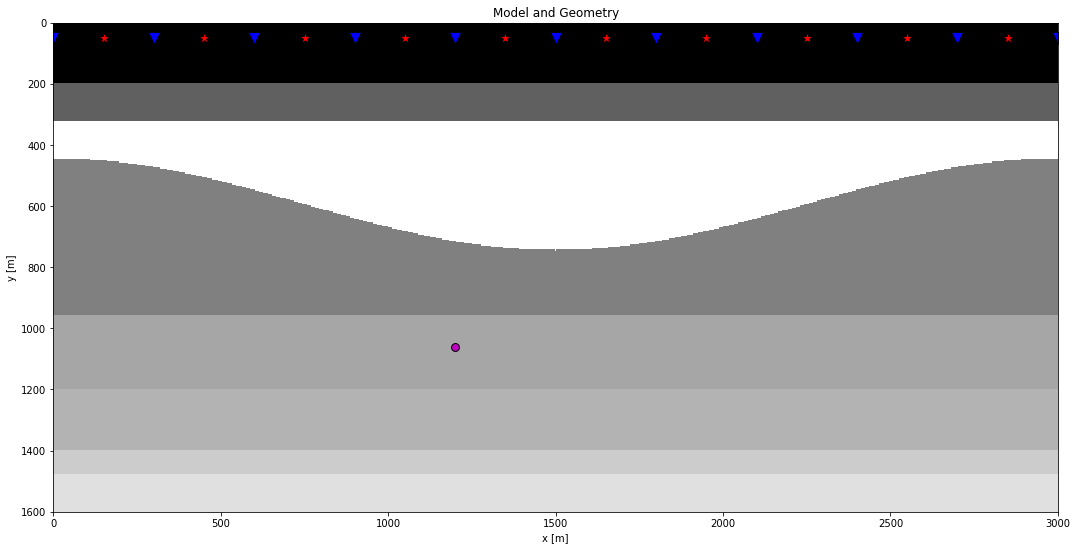

In [2]:
inputfile = '../data/marchenko/input.npz'
inputdata = np.load(inputfile)

# Receivers
r = inputdata['r']
nr = r.shape[1]
dr = r[0,1]-r[0,0]

# Sources
s = inputdata['s']
ns = s.shape[1]
ds = s[0,1]-s[0,0]

# Virtual points
vs = inputdata['vs']

# Density model
rho = inputdata['rho']
z, x = inputdata['z'], inputdata['x']

# Velocity model
vel = 2400.0

plt.figure(figsize=(18,9))
plt.imshow(rho, cmap='gray', extent = (x[0], x[-1], z[-1], z[0]))
plt.scatter(s[0, 5::10], s[1, 5::10], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(r[0, ::10],  r[1, ::10], marker='v', s=150, c='b', edgecolors='k')
plt.scatter(vs[0], vs[1], marker='.', s=250, c='m', edgecolors='k')
plt.axis('tight')
plt.xlabel('x [m]'),plt.ylabel('y [m]'),plt.title('Model and Geometry')
plt.xlim(x[0], x[-1]);

In [3]:
# time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# FD GF
G0FD = inputdata['G0sub']
wav = inputdata['wav']
wav_c = np.argmax(wav)

G0FD = np.apply_along_axis(convolve, 0, G0FD, wav, mode='full') 
G0FD = G0FD[wav_c:][:nt]

# Analytic GF
trav = np.sqrt((vs[0]-r[0])**2+(vs[1]-r[1])**2)/vel
G0ana = directwave(wav, trav, nt, dt, nfft=nt)

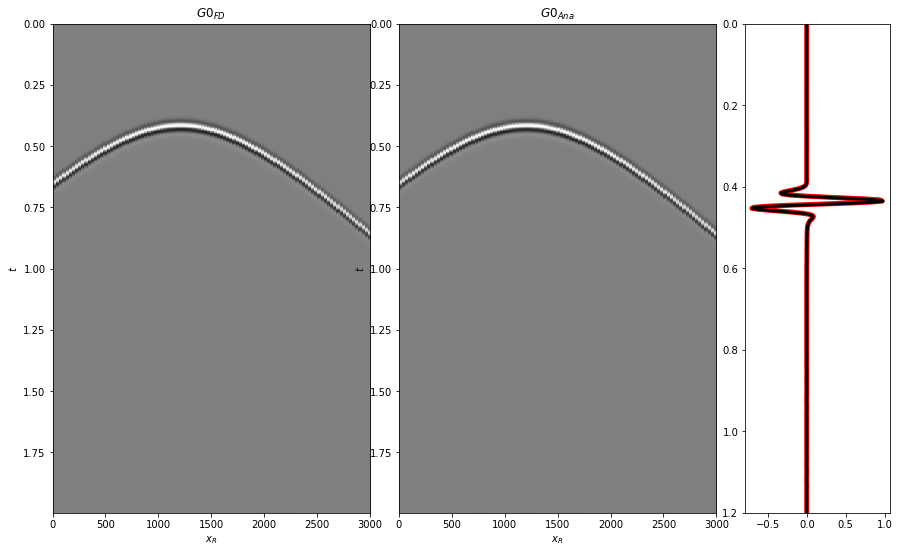

In [4]:
fig = plt.figure(figsize=(15,9))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((1, 5), (0, 2), colspan=2)
ax3 = plt.subplot2grid((1, 5), (0, 4))

ax1.imshow(G0FD/G0FD.max(), cmap='gray', vmin=-1, vmax=1, 
           extent=(r[0,0], r[0,-1], t[-1], t[0]))
ax1.set_title(r'$G0_{FD}$'), ax1.set_xlabel(r'$x_R$'), ax1.set_ylabel(r'$t$')
ax1.axis('tight')
ax2.imshow(G0ana/G0ana.max(), cmap='gray', vmin=-1, vmax=1, 
           extent=(r[0,0], r[0,-1], t[-1], t[0]))
ax2.set_title(r'$G0_{Ana}$'), ax2.set_xlabel(r'$x_R$'), ax2.set_ylabel(r'$t$')
ax2.axis('tight')

ax3.plot(G0FD[:, nr//2]/G0FD.max(), t, 'r', lw=5)
ax3.plot(G0ana[:, nr//2]/G0ana.max(), t, 'k', lw=3)

ax3.set_ylim(1.2, 0);

## 3D

In [5]:
inputfile = '../data/marchenko/direct3D.npz'
inputdata = np.load(inputfile)

In [6]:
# Receivers
r = inputdata['r']
nr = r.shape[0]

# Sources
s = inputdata['s']
ns = s.shape[0]

# Virtual points
vs = inputdata['vs']

# Velocity model
vel = 2400.0

In [7]:
# time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# FD GF
G0FD = inputdata['G0'][:, :nr]

G0FD = np.apply_along_axis(convolve, 0, G0FD, wav, mode='full') 
G0FD = G0FD[wav_c:][:nt]

# Analytic GF
dist = np.sqrt((vs[0]-r[:, 0])**2+(vs[1]-r[:, 1])**2+(vs[2]-r[:, 2])**2)
trav = dist/vel
G0ana = directwave(wav, trav, nt, dt, nfft=nt, dist=dist, kind='3d')

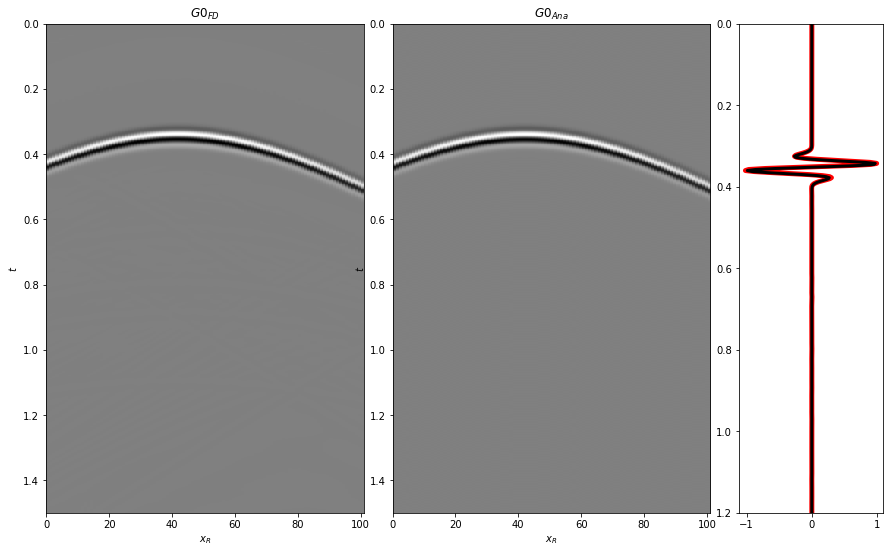

In [8]:
fig = plt.figure(figsize=(15,9))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=2)
ax2 = plt.subplot2grid((1, 5), (0, 2), colspan=2)
ax3 = plt.subplot2grid((1, 5), (0, 4))

ax1.imshow(G0FD/G0FD.max(), cmap='gray', vmin=-1, vmax=1, 
           extent=(0, nr, t[-1], t[0]))
ax1.set_title(r'$G0_{FD}$'), ax1.set_xlabel(r'$x_R$'), ax1.set_ylabel(r'$t$')
ax1.axis('tight')
ax2.imshow(G0ana/G0ana.max(), cmap='gray', vmin=-1, vmax=1, 
           extent=(0, nr, t[-1], t[0]))
ax2.set_title(r'$G0_{Ana}$'), ax2.set_xlabel(r'$x_R$'), ax2.set_ylabel(r'$t$')
ax2.axis('tight')

ax3.plot(G0FD[:, nr//2]/G0FD.max(), t, 'r', lw=5)
ax3.plot(G0ana[:, nr//2]/G0ana.max(), t, 'k', lw=3)
ax3.set_ylim(1.2, 0);